In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
df = pd.read_excel("faults.xlsx")
print(df.head())

   Fault Current  Type of Fault
0           2.72              0
1           3.52              0
2           1.34              0
3           5.67              0
4           7.29              1


In [31]:
# Split Features and Label
X = df[["Fault Current"]]   # Single feature
y = df["Type of Fault"]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build KNN Model
knn = KNeighborsClassifier(n_neighbors=3)   # Using 3 since dataset is small
knn.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [32]:
# Prediction
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6666666666666666


In [33]:
# Print Correct & Wrong Predictions
for i in range(len(X_test)):
    print("\nTest data:", X_test.iloc[i].values,
          "| True label:", y_test.iloc[i],
          "| Predicted:", y_pred[i])
    
    if y_test.iloc[i] == y_pred[i]:
        print("Correct prediction")
    else:
        print("Wrong prediction")



Test data: [4.23] | True label: 0 | Predicted: 0
Correct prediction

Test data: [0.32] | True label: 1 | Predicted: 0
Wrong prediction

Test data: [2.72] | True label: 0 | Predicted: 0
Correct prediction


In [34]:
# User Input Prediction
F = float(input("\nEnter Fault Current value: "))
user_df = pd.DataFrame([[F]], columns=["Fault Current"])
predicted_label = knn.predict(user_df)
print("Predicted Fault Type:", predicted_label[0])



Enter Fault Current value:  4.5


Predicted Fault Type: 0


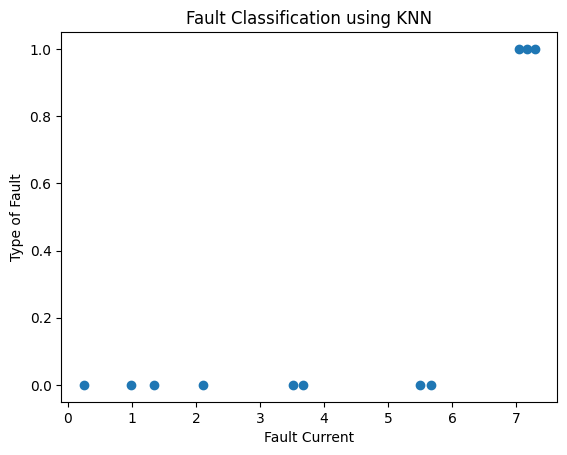

In [35]:
plt.scatter(X_train, y_train)
plt.xlabel("Fault Current")
plt.ylabel("Type of Fault")
plt.title("Fault Classification using KNN")
plt.show()